**Gradient Boosting Classification for Survival Prediction**

Prepared by:    FARAZ ANSARI

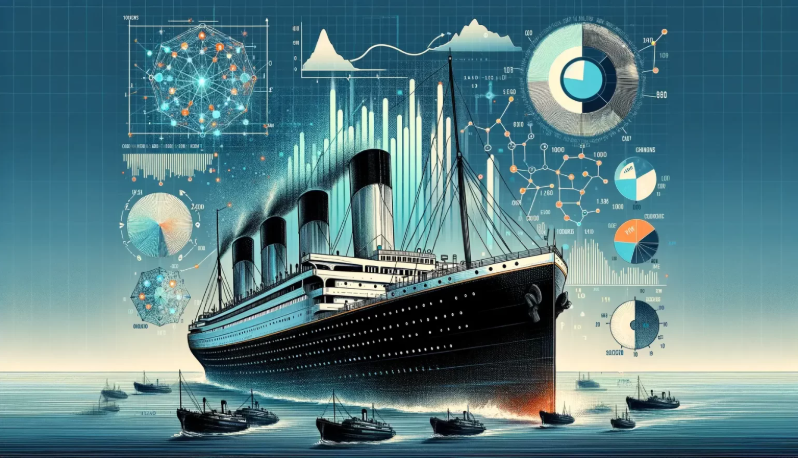

# **Dataset** **Overview**

**Features** :
  * **PassengerId**: A unique Identifier for each passenger.
  * **Pclass**: The class in which passenger was travelling (1st, 2nd and 3rd class).
  * **Name**: The name of the passenger.
  * **Sex**: The gender of the passenger (male or female).
  * **Age**: The age of the passenger.
  * **Sibsp**: The No of siblings or spouses the passenger had abroad the titanic.
  * **Parch**: The No of parents or children the passenger had abroad the titanic.
  * **Ticket**: The ticket No of the passenger.
  * **Fare**: The amount of money the passenger paid for the ticket.
  * **Cabin**: The cabin  Number where the passenger stayed.
  * **Embarked**: The port where the passenger boarded the titanic (C = cherbourg; Q= Queenstown; S = Southampton).
  * **X**: indicates whether the passenger survived (1) or not (0).


  
   



# Imports and Reading Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
#loading the dataset
data = pd.read_csv('/content/Titanic-Dataset.csv')

In [7]:
# checking the shape of data
data.shape

(891, 12)

In [8]:
#seeing first few rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#seeing last few rows
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
#making a copy of dataframe
data_t = data.copy()

In [11]:
# counts of duplicate rows in the data frame
data_t.duplicated().sum()

0

In [12]:
# drop the duplicated rows
data_t = data_t.drop_duplicates()

First i perfer to remove the useless columns that's not gonna affect on our  output so we can see the data clear enough so.... PassengerId name ticket that won't affect on our outpot

In [13]:
data_t.drop(columns=['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [14]:
# checking info about data and missing value
data_t.info()
print('*'*40)
data_t.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
****************************************


,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


we have catoirgal data in sex , cabin,and embarked let's replace them with numrical data

In [48]:
# data types of each columns
data_t.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
Embarked,int64
Family,int64


In [49]:
# the number of occurances of each elements in dataframe
data_t.count()

,0
Survived,891
Pclass,891
Sex,891
Age,891
Embarked,891
Family,891


In [44]:
# list of columns
data_t.columns.tolist()

['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'Family']

In [52]:
# print unique values number for each numeric variable
for col in data_t:
  print(f"unique values number in '{col} ':")
  print(data_t[col].nunique())
  print('-'*40)

unique values number in 'Survived ':
2
----------------------------------------
unique values number in 'Pclass ':
3
----------------------------------------
unique values number in 'Sex ':
2
----------------------------------------
unique values number in 'Age ':
94
----------------------------------------
unique values number in 'Embarked ':
3
----------------------------------------
unique values number in 'Family ':
9
----------------------------------------


In [15]:
data_t['Sex'] = data_t['Sex'].map({'male' : 0, 'female' : 1}).astype(int)

In [16]:
data_t.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,NaN,S
1,1,1,1,38.0,1,0,71.2833,C85,C
2,1,3,1,26.0,0,0,7.9250,NaN,S
3,1,1,1,35.0,1,0,53.1000,C123,S
4,0,3,0,35.0,0,0,8.0500,NaN,S


In [17]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


we have alot of Nan in cabin which we can't deal with it so we will drop it

In [18]:
# droping the 'Cabin' column
data_t.drop(columns='Cabin', axis=1, inplace=True)

In [19]:
# filling nan values in 'Embarked' columns
data_t['Embarked'] = data_t['Embarked'].fillna(data_t['Embarked'].mode()[0])

In [20]:
# checking for unique value in 'Embarked'
data_t['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [21]:
# converting categorial val into numeric in 'Embarked'
data_t['Embarked'] = data_t['Embarked'].map({'S' :1,  'C' :2, 'Q'  :3 }).astype(int)

NOW! to the hard part we can replace the Nan in the age with mean of it which won't be accurate enought so here is an example of what i am going to do we can check the males in Pclass 1 for example and get the mean then replace the nan in that pclass 1 for males same for the rest

In [22]:
for i in range(0, 2):
  for j in range(1, 4):
    age_mean = data_t[(data_t['Sex'] == i) & (data_t['Pclass'] == j )]['Age'].dropna().mean()
    data_t.loc[(data_t.Age.isnull()) & (data_t.Sex == i) & (data_t.Pclass == j), 'Age']= age_mean

The passenger Fare will not help if the passenger survived or not so i am going to drop it

In [23]:
data_t.drop(columns='Fare', axis =1, inplace=True)

now before we move on we have two columns 'parch' and 'sibsp' parch is the number of spouses aboard the Titanic sibsp is the number of of parents / children aboard the Titanic which is better to merage them in one cloumn

In [24]:
# joining two column in one column 'Family'
data_t['Family'] = data_t['Parch'] + data_t['SibSp'] + 1
data_t.drop(columns=['Parch', 'SibSp'], axis = 1, inplace=True)

In [25]:
# Count the number of occurrences for each category in the target variable 'Survived'
data_t['Survived'].value_counts()

,count
Survived,
0,549
1,342


Now the data is Cleaned

In [26]:
#descriptive statistics
data_t.describe()

,Survived,Pclass,Sex,Age,Embarked,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.318643,1.361392,1.904602
std,0.486592,0.836071,0.477990,13.281103,0.635673,1.613459
min,0.000000,1.000000,0.000000,0.420000,1.000000,1.000000
25%,0.000000,2.000000,0.000000,21.750000,1.000000,1.000000
50%,0.000000,3.000000,0.000000,26.507589,1.000000,1.000000
75%,1.000000,3.000000,1.000000,36.000000,2.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,3.000000,11.000000


# Exploratory Data Analysis (EDA)

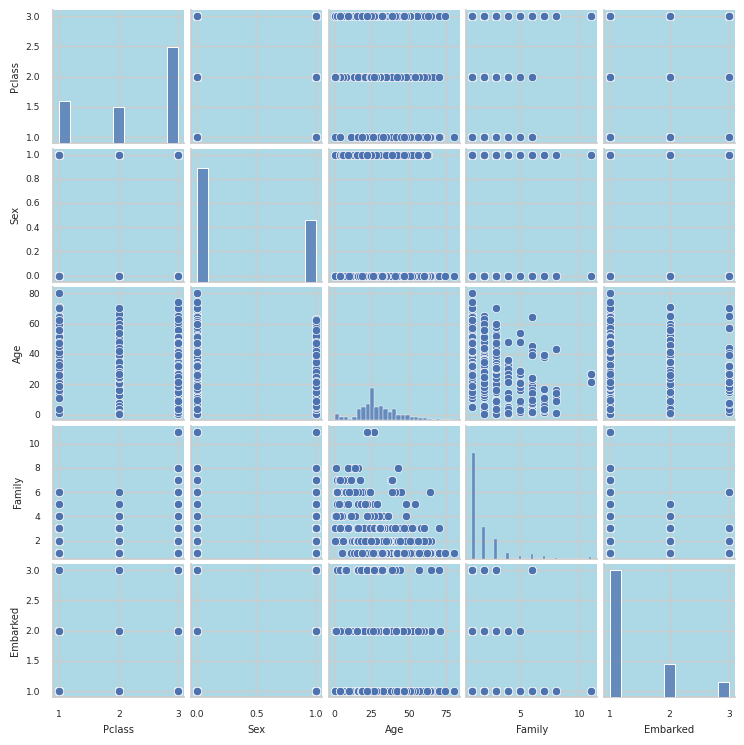

In [27]:
sns.set(style='whitegrid', rc={'axes.facecolor': 'lightblue'})
sns.set_context("notebook", font_scale=0.6)
sns.pairplot(data=data_t [['Pclass', 'Sex', 'Age', 'Family', 'Embarked']], diag_kind= 'hist', height=1.5);
plt.show()

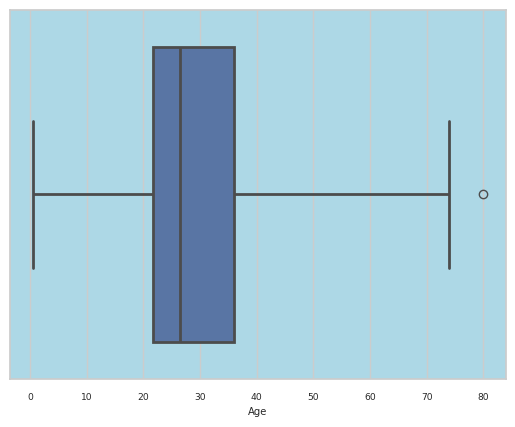

In [43]:
sns.boxplot(x=data_t['Age'], whis=3, linewidth=2);

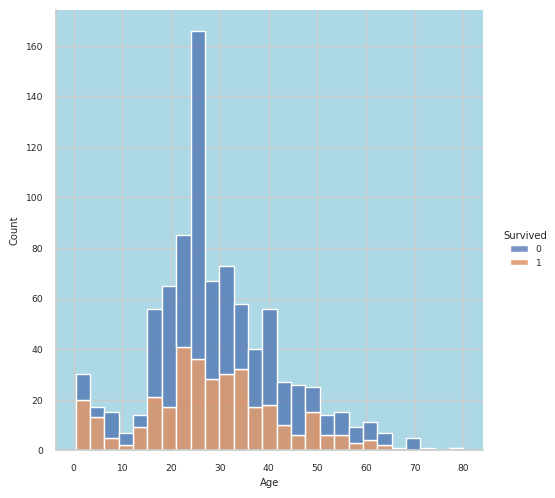

In [29]:
sns.displot(x=data_t["Age"], hue=data_t["Survived"], multiple="stack");

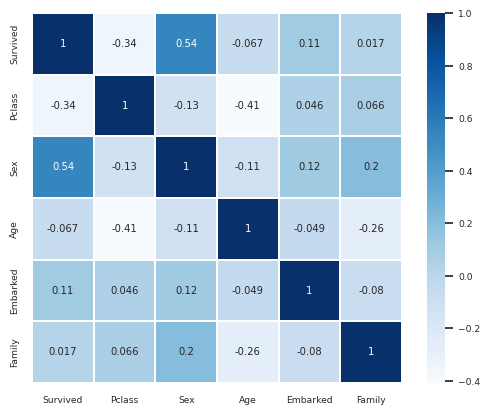

In [30]:
sns.heatmap(data_t.corr(), annot=True, linewidths=0.1, vmax=1.0, square=True, cmap='Blues');

In [31]:
data_t.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'Family'], dtype='object')

In [32]:
# spiliting the data
X = data_t.drop(columns='Survived', axis=1)
Y= data_t['Survived']

In [33]:
# standardized the data
scaler = StandardScaler()
scaler.fit(X)
X_s = scaler.transform(X)

In [34]:
print(X_s)

[[ 0.82737724 -0.73769513 -0.55136635 -0.56883712  0.05915988]
 [-1.56610693  1.35557354  0.65402951  1.00518113  0.05915988]
 [ 0.82737724  1.35557354 -0.25001739 -0.56883712 -0.56097483]
 ...
 [ 0.82737724  1.35557354 -0.57020066 -0.56883712  1.29942929]
 [-1.56610693 -0.73769513 -0.25001739  1.00518113 -0.56097483]
 [ 0.82737724 -0.73769513  0.20200606  2.57919938 -0.56097483]]


Spilit the data into train and test

In [35]:
# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X_s, Y, test_size=0.2, stratify=Y, random_state=2)

In [36]:
#loading the model
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, Y_train)

GradientBoostingClassifier()

In [37]:
# accuracy score on train data
X_train_predic = model_gb.predict(X_train)
X_train_accu_gb = accuracy_score(X_train_predic, Y_train)
print('Accurcay on trai  Data :', X_train_accu_gb)

Accurcay on trai  Data : 0.8721910112359551


In [38]:
# accuracy score on test data
X_test_predic = model_gb .predict(X_test)
X_test_accu_gb = accuracy_score(X_test_predic, Y_test)
print('Accuracy on test data :', X_test_accu_gb)

Accuracy on test data : 0.8212290502793296


In [39]:
print('Classification Report :')
print(classification_report(Y_test, X_test_predic))

Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.84      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



In [40]:
mat = confusion_matrix(Y_test, X_test_predic)
print(mat)

[[101   9]
 [ 23  46]]


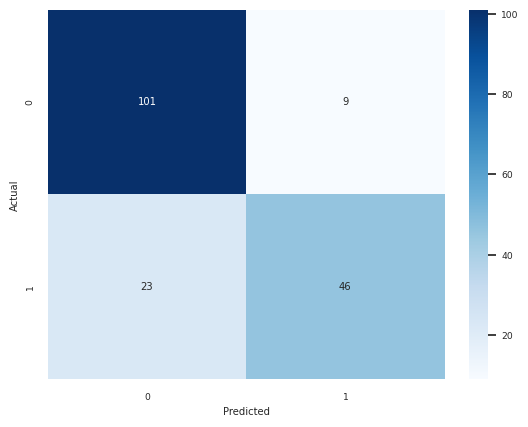

In [41]:
sns.heatmap(mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()